In [1]:
# Load the required libraries
library(dplyr)
library(readr)
library(cowplot)
library(datateachr)
library(infer)
library(repr)
library(tidyverse)
library(digest)
library(gridExtra)


# Read the alzheimer dataset CSV file into a data frame from the github web

data_alzheimer <- read.csv("https://raw.githubusercontent.com/yuwangy/alzheimer_analysis/main/oasis_longitudinal.csv")
head(data_alzheimer)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




,Subject.ID,MRI.ID,Group,Visit,MR.Delay,M.F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0.0,1987,0.696,0.883
2,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0.0,2004,0.681,0.876
3,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NA,23,0.5,1678,0.736,1.046
4,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NA,28,0.5,1738,0.713,1.010
5,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NA,22,0.5,1698,0.701,1.034
6,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,28,0.0,1215,0.710,1.444


In [14]:
# select alzheimer type and brain volume columns from alzheimer dataset
# Demented: diagnosed with dementia
# Nondemented: not diagnosed with dementia, may be used as a control group in the study
# Converted: initially didn't have dementia but developed it over the course of the study

# nwbv <- data_alzheimer |>
# select(Group, nWBV)
# head(nwbv)

# # generate bootstrapping samples and calculate sample means for brain volume

# nwbv_sample <- nwbv |>
# rep_sample_n(size = 10, reps = 200, replace = T) |>
# group_by(replicate) |>
# summarize(sample_mean = mean(nWBV)) 

# head(nwbv_sample)

# filter for demented and nondemented patients
# select alzheimer type and brain volume columns from alzheimer dataset
# remove missing NA values from nWBV


nwbv1 <- data_alzheimer |>
filter(Group == "Demented" | Group == "Nondemented") |>
filter(!is.na(nWBV)) |>
select(Subject.ID, Group, nWBV)

head(nwbv1)

nrow(nwbv1)

nwbv1|>
group_by(Subject.ID)|>
summarize(mean(nWBV)) |>
nrow()

# mean value for the group

nwbv <- nwbv1 |>
group_by(Group, Subject.ID) |>
summarize(nWBV = mean(nWBV))

head(nwbv)
nrow(nwbv)



,Subject.ID,Group,nWBV
,<chr>,<chr>,<dbl>
1,OAS2_0001,Nondemented,0.696
2,OAS2_0001,Nondemented,0.681
3,OAS2_0002,Demented,0.736
4,OAS2_0002,Demented,0.713
5,OAS2_0002,Demented,0.701
6,OAS2_0004,Nondemented,0.710


[1] 336

[1] 136

`summarise()` has grouped output by 'Group'. You can override using the
`.groups` argument.


Group,Subject.ID,nWBV
<chr>,<chr>,<dbl>
Demented,OAS2_0002,0.7166667
Demented,OAS2_0007,0.7283333
Demented,OAS2_0009,0.7985000
Demented,OAS2_0010,0.7605000
Demented,OAS2_0014,0.6965000
Demented,OAS2_0016,0.6530000


[1] 136

In [15]:
# calculate mean, median brain volume, its standard deviation for patients diagnosed with dementia,
# not diagnosed with dementia, developed over the course respectively

nwbv_demented <- data_alzheimer |>
filter(Group == "Demented") |>
summarize(demented_mean = mean(nWBV),
          demented_sd = sd(nWBV),
          demented_median = median(nWBV))


nwbv_nondemented <- data_alzheimer |>
filter(Group == "Nondemented") |>
summarize(nondemented_mean = mean(nWBV),
          nondemented_sd = sd(nWBV),
          nondemented_median = median(nWBV))

nwbv_converted <- data_alzheimer |>
filter(Group == "Converted") |>
summarize(converted_mean = mean(nWBV),
          converted_sd = sd(nWBV),
          converted_median = median(nWBV))

nwbv_demented
nwbv_nondemented
nwbv_converted


demented_mean,demented_sd,demented_median
<dbl>,<dbl>,<dbl>
0.7163014,0.0319211,0.712


nondemented_mean,nondemented_sd,nondemented_median
<dbl>,<dbl>,<dbl>
0.7409,0.037705,0.739


converted_mean,converted_sd,converted_median
<dbl>,<dbl>,<dbl>
0.7237297,0.03543041,0.718


In [16]:
# With bootstrap sampling, calculate mean, median brain volume, its 
# standard deviation for patients diagnosed with dementia,
# not diagnosed with dementia, developed over the course respectively

demented_sample <- data_alzheimer |>
filter(Group == "Demented") |>
rep_sample_n(size = 10, reps = 100, replace = T) |>
group_by(replicate) |>
summarize(demented_mean = mean(nWBV),
          demented_sd = sd(nWBV),
          demented_median = median(nWBV))

nondemented_sample <- data_alzheimer |>
filter(Group == "Nondemented") |>
rep_sample_n(size = 10, reps = 100, replace = T) |>
group_by(replicate) |>
summarize(nondemented_mean = mean(nWBV),
          nondemented_sd = sd(nWBV),
          nondemented_median = median(nWBV))

converted_sample <- data_alzheimer |>
filter(Group == "Converted") |>
rep_sample_n(size = 10, reps = 100, replace = T) |>
group_by(replicate) |>
summarize(converted_mean = mean(nWBV),
          converted_sd = sd(nWBV),
          converted_median = median(nWBV))

head(demented_sample)
head(nondemented_sample)
head(converted_sample)



replicate,demented_mean,demented_sd,demented_median
<int>,<dbl>,<dbl>,<dbl>
1,0.7277,0.01939101,0.7255
2,0.7122,0.02530173,0.7060
3,0.7163,0.03015902,0.7225
4,0.7327,0.02092341,0.7405
5,0.7071,0.03522136,0.7110
6,0.7397,0.03472127,0.7390


replicate,nondemented_mean,nondemented_sd,nondemented_median
<int>,<dbl>,<dbl>,<dbl>
1,0.7274,0.03510999,0.7230
2,0.7363,0.04757696,0.7390
3,0.7491,0.03844607,0.7500
4,0.7426,0.03623749,0.7435
5,0.7599,0.03592724,0.7690
6,0.7494,0.04770791,0.7495


replicate,converted_mean,converted_sd,converted_median
<int>,<dbl>,<dbl>,<dbl>
1,0.7297,0.04194984,0.7200
2,0.7059,0.02793425,0.7080
3,0.7093,0.02691158,0.7160
4,0.7218,0.03224834,0.7225
5,0.7329,0.03533475,0.7310
6,0.7152,0.02760354,0.7140


In [17]:
# t-test

t_test <- t.test(nWBV ~ Group, data = nwbv, alternative = "less", subset = Group %in% c("Nondemented", "Demented"))

print(t_test)




	Welch Two Sample t-test

data:  nWBV by Group
t = -3.8343, df = 133.44, p-value = 9.664e-05
alternative hypothesis: true difference in means between group Demented and group Nondemented is less than 0
95 percent confidence interval:
        -Inf -0.01305005
sample estimates:
   mean in group Demented mean in group Nondemented 
                0.7175107                 0.7404854 



In [18]:
# infer package

library(infer)

null_distribution <- nwbv %>% 
  specify(formula = nWBV ~ Group) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in means", order = c("Nondemented", "Demented"))

head(null_distribution)


replicate,stat
<int>,<dbl>
1,-0.0089981481
2,0.0072246528
3,0.0008152199
4,-0.0032945891
5,0.0039363137
6,0.0001255787


In [19]:
# calculate observed stat diff in mean nWBV for nondemented and demented groups

obs_diff_mean <- nwbv |>
specify(formula = nWBV ~ Group) |>
calculate(stat = "diff in means", order = c("Nondemented", "Demented"))

obs_diff_mean


stat
<dbl>
0.02297474


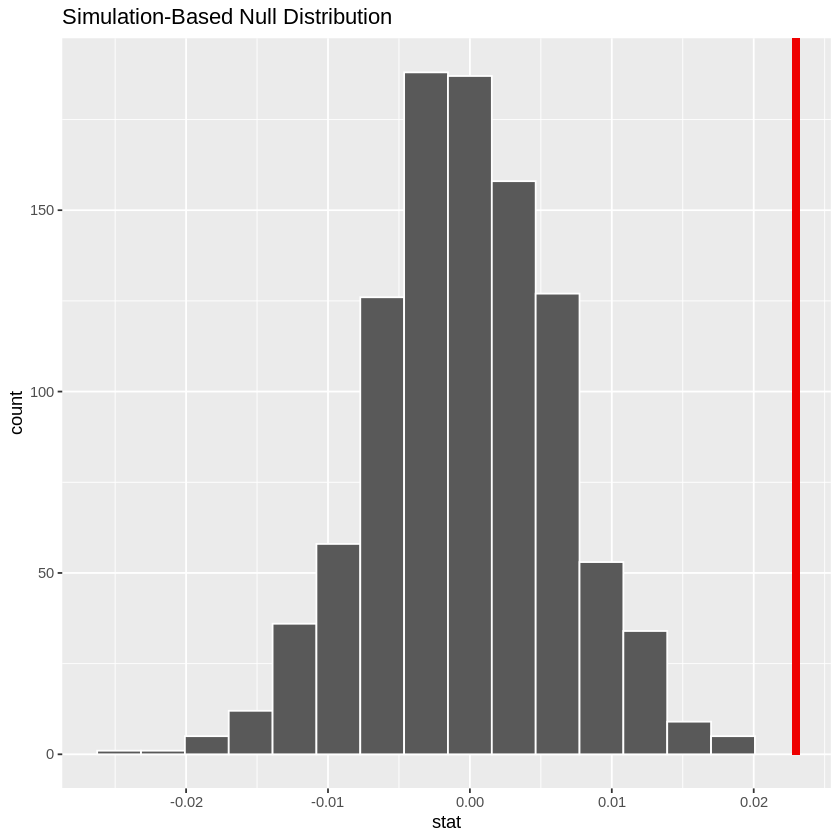

In [20]:
# visualize null distribution and p-value

visualize(null_distribution) + 
shade_p_value(obs_stat = obs_diff_mean, direction = "right")
     
